# STAT3612 Data Mining (2018-19 Semester 2)<a class="anchor" id="top">
## Tutorial Class 3 Generalized Linear Models (GLM)
### _Prepared by Dr. Gilbert Lui_

### Table of Contents:


* [Introduction to Genearlized Linear Model](#glm)
    * [Explanatory Data Analysis]()
    * [Standardization]()

<div style="text-align: right"><a href="#top">Back to the top</a></div>

## Why Generlized Linear Models (GLMs)?

- In classical linear models, target variable Y is explained by a linear combination of input variables $X_1$, $X_2$, ..., $X_k$. In particular,

\begin{align}
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k + \varepsilon
\end{align}

where $\varepsilon$ denotes the model error which cannot be explained by the linear combination of $X$'s.

However, the **target variable Y should be continuous** in this classical linear model. GLMs are considered to extend this classical linear model to handle various types of target variable.

## What are GLMs?

Basically, GLMs consist of three components:
1. Random component $Y$ has a probability distribution in the exponential family.
2. Systematic component $\eta=\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k$.
3. Link function $g(\cdot)$ relates both random component and systematic component by
\begin{align}
g(\mu) &= \eta,
\end{align}
where $\mu=E(Y)$ and $g(\cdot)$ is a monotonic differentiable function.

Simply speaking, in GLM, the transformed mean of $Y$ is explained by the linear combination of $X$'s.

## Special cases of GLMs

### A. Linear regression
Three compnoents of GLM:
1. $Y$ is normally distributed.
2. $\eta=\beta_0 + \sum_{i=1}^k \beta_i X_i$.
3. $g(\mu)=\mu$ where $\mu=E(Y)$.

Based on the above settings,

\begin{align}
\mu = \beta_0 + \sum_{i=1} \beta_i X_i.
\end{align}

### B. Logistic regression
1. $Y$ is binary (e.g. {0,1}).
2. $\eta=\beta_0 + \sum_{i=1}^k \beta_i X_i$.
3. $g(\mu)=\log \left ( \dfrac{\mu}{1-\mu} \right )$ where $\mu=E(Y)=P(Y=1)$.

Based on the above settings,
\begin{eqnarray*}
\mu &= P(Y=1) &=& \dfrac{\exp(\beta_0 + \sum_{i=1}^k \beta_i X_i)}{1+\exp(\beta_0 + \sum_{i=1}^k \beta_i X_i)}. \\
\mbox{ and }1-\mu &= P(Y=0) &=& \dfrac{1}{1+\exp(\beta_0 + \sum_{i=1}^k \beta_i X_i)}. \\
\end{eqnarray*}

### C. Softmax regression
1. $Y=1,2,...,K$ is multinomial.
2. $\eta_j=\beta_{j0} + \sum_{i=1}^k \beta_{ji} X_i$ for $j=1,2,...,K-1$.
3. The link functions are $\log \dfrac{\mu_j}{\mu_K} = \eta_j$ where $\mu_j=P(Y=j)$ for $j=1,2,...,K-1$.

Based on the above settings,
\begin{eqnarray*}
\mu_j = P(Y=j) &=& \dfrac{\exp(\beta_{j0} + \sum_{i=1}^k \beta_{ji} X_i)}{1+\exp(\beta_0 + \sum_{i=1}^k \beta_{ji} X_i)} \mbox{ for } j=1,2,...,K-1,\\
\mbox{ and } \mu_K = P(Y=K) &=& \dfrac{1}{1+\exp(\beta_0 + \sum_{i=1}^k \beta_{ji} X_i)}
\end{eqnarray*}

Note that
\begin{align}
\sum_{j=1}^K \mu_j = 1.
\end{align}

### Example of Linear Regression

The dataset of diabetes contains 442 recrods of diabetes patients. In the data file, the first column stores the values of a response variable which is indeed a quantitative measure of disease progression one year after baseline and the remaining columns are the age, sex, body mass index, average blood pressure, and six blood serum measurements. All the observations are stored in the data file diabetes.csv (Note that this file has no header information).

As demonstrated in the lecture, the `statsmodels` package can generate the standard errors of parameter estimates and diagnostic statistics more easily. In the following, the `scikit-learn` package will be used for illustration purpose.

In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy as sc
import scipy.stats

diab = pd.read_csv("diabetes.csv", 
                   header=None, 
                   names=['target', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
varlist = list(diab.columns)
y = diab[varlist[0]]
x = diab[varlist[1:]]

lm = LinearRegression()
res = lm.fit(x,y)
n, k = x.shape
# bhat estimate
bhat = np.append(lm.intercept_, lm.coef_)
yhat = np.matrix(lm.predict(x)).T
# change x and y to np.array
x = np.hstack((np.ones((n,1)),np.matrix(x)))
y = np.matrix(y).T
# degree of freedom
df = float(n-k-1)
# estimated error variance
sse = np.sum(np.square(yhat-y),axis=0)
sig2 = sse/df
bvar = np.squeeze(np.asarray(sig2*sc.linalg.inv(x.T*x).diagonal()))
# standard error of bhat
bse = np.sqrt(bvar)
# t-statistics of bhat
bTstat = np.zeros(len(bse))
for i in range(len(bse)):
    bTstat[i] = bhat[i]/bse[i]
# p-value of bhat
bPVal = 1 - scipy.stats.t.cdf(abs(bTstat),df)

vlist = ['Intercept']
for i in varlist[1:]:
    vlist.append(i)
dfout = pd.DataFrame({'Variable': vlist,
                      'Estimate': bhat,
                      'S.E.': bse,
                      't-ratio': bTstat,
                      'p-value': bPVal})
new_order = [2,0,1,4,3]
dfout = dfout[dfout.columns[new_order]]
# show the estimation result of regression coefficients
print(dfout)
rsq = sklearn.metrics.r2_score(y, yhat)
adjrsq = 1-(1-rsq)*(n-1)/df
fstat = rsq / (1-rsq) * df / k
print("R-Squared =", rsq)
print("Adj. R-Squared =", adjrsq)
print("F-Statistics =", fstat)

     Variable    Estimate        S.E.    t-ratio       p-value
0   Intercept  152.144861    2.575719  59.068897  0.000000e+00
1         age  -10.023929   59.744502  -0.167780  4.334175e-01
2         sex -239.918384   61.235668  -3.917952  5.191171e-05
3         bmi  519.615096   66.520897   7.811306  2.176037e-14
4          bp  324.530793   65.416914   4.960962  5.056501e-07
5          s1 -795.181921  416.385890  -1.909724  2.841619e-02
6          s2  478.939415  338.944878   1.413030  7.918427e-02
7          s3  102.441665  212.395702   0.482315  3.149135e-01
8          s4  177.964285  161.592143   1.101318  1.356865e-01
9          s5  752.487514  171.812977   4.379690  7.469098e-06
10         s6   67.351445   65.976527   1.020839  1.539516e-01
R-Squared = 0.517799740968
Adj. R-Squared = 0.506611799923
F-Statistics = 46.2819511556


### Model diagnostics

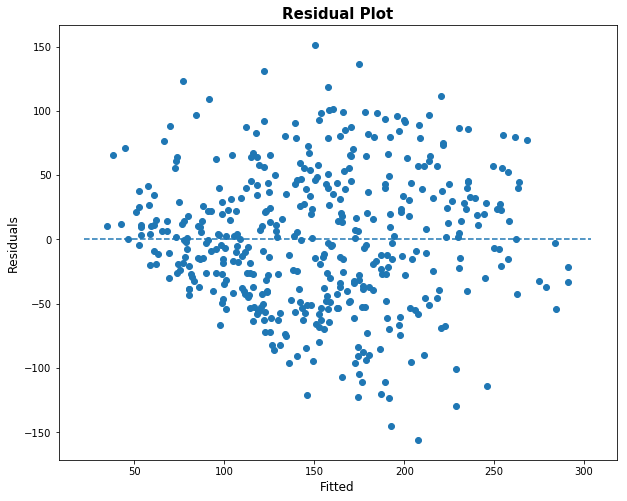

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

res = np.squeeze(np.asarray(y)) - np.squeeze(np.asarray(yhat))
yplot = np.squeeze(np.asarray(yhat))
plt.figure(figsize=(10, 8))
plt.scatter(yplot, res)
plt.plot(plt.xlim(), [0,0], linestyle='dashed')
plt.xlabel('Fitted', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot',fontsize=15, fontweight="bold")

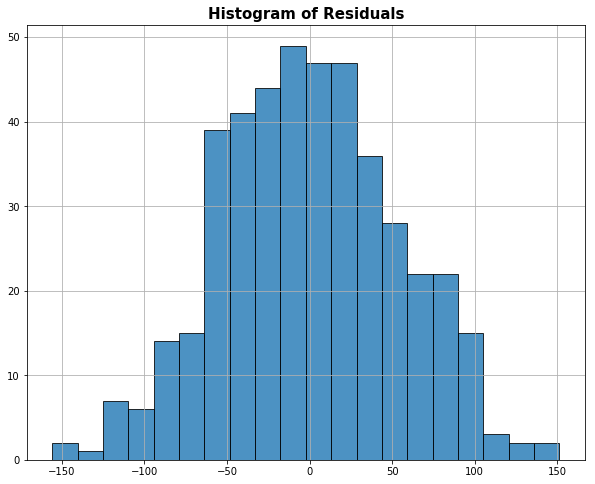

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(res, bins=20, edgecolor='k', alpha=0.8)
plt.title('Histogram of Residuals',fontsize=15, fontweight="bold")
plt.grid(True)

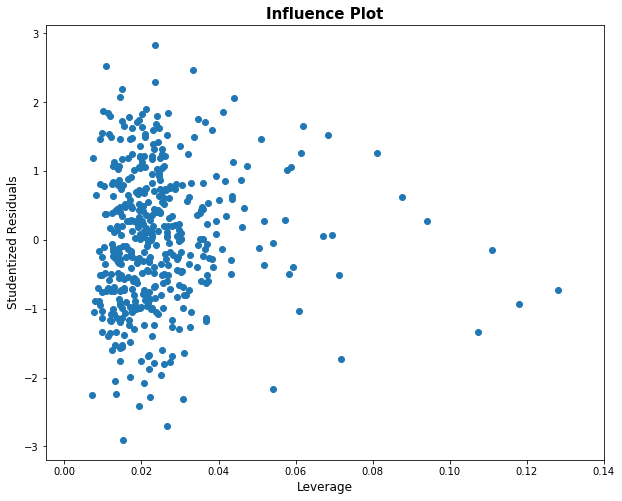

In [4]:
# compute leverage for outlier observations
Hmat = x @ sc.linalg.inv(x.T*x) @ x.T
leverage = np.squeeze(np.asarray(Hmat.diagonal()))
mse = sklearn.metrics.mean_squared_error(y, yhat)
cookD = np.squeeze(np.asarray(np.square(y-yhat)))/((k+1)*mse)*leverage/(1-np.square(leverage))
rstudent = np.squeeze(np.asarray(y-yhat))/np.sqrt(sig2*(1-leverage))

plt.figure(figsize=(10, 8))
plt.scatter(leverage, rstudent)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Studentized Residuals', fontsize=12)
plt.title('Influence Plot',fontsize=15, fontweight="bold")

### Detect Collinearity

In [5]:
diab[varlist[1:]].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173705,0.185129,0.335340,0.259963,0.219223,-0.075238,0.203958,0.270790,0.301877
sex,0.173705,1.000000,0.088065,0.240991,0.035238,0.142650,-0.379108,0.332159,0.149896,0.208093
bmi,0.185129,0.088065,1.000000,0.395364,0.249733,0.261150,-0.366709,0.413754,0.446157,0.388626
bp,0.335340,0.240991,0.395364,1.000000,0.242347,0.185457,-0.178793,0.257551,0.393465,0.390566
s1,0.259963,0.035238,0.249733,0.242347,1.000000,0.896742,0.051404,0.542271,0.515459,0.325643
s2,0.219223,0.142650,0.261150,0.185457,0.896742,1.000000,-0.196489,0.659900,0.318450,0.290463
s3,-0.075238,-0.379108,-0.366709,-0.178793,0.051404,-0.196489,1.000000,-0.738593,-0.398632,-0.273650
s4,0.203958,0.332159,0.413754,0.257551,0.542271,0.659900,-0.738593,1.000000,0.617953,0.417135
s5,0.270790,0.149896,0.446157,0.393465,0.515459,0.318450,-0.398632,0.617953,1.000000,0.464778
s6,0.301877,0.208093,0.388626,0.390566,0.325643,0.290463,-0.273650,0.417135,0.464778,1.000000


In [6]:
# compute VIF
vif_reg = LinearRegression()
vif = np.zeros(k)
for i in range(1,x.shape[1]):
    vif_x = np.delete(x,[0,i],axis=1)
    vif_y = x[:,i]
    vif_reg.fit(vif_x, vif_y)
    xhat = np.matrix(vif_reg.predict(vif_x))
    vif_rsq = sklearn.metrics.r2_score(vif_y, xhat)
    vif[i-1] = 1/(1-vif_rsq)
np.round(vif,2)

array([  1.22,   1.28,   1.51,   1.46,  59.14,  39.17,  15.38,   8.9 ,
        10.06,   1.48])

### Example of Logistic Regression Model

Consider a glass identificaiton data set in UCI Machine Learning Repository. In this data set, there are 214 observations and the glasses are classified into 7 categories. The types of glasses are described as follows:

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

Also, the glasses are identified by 10 input variables:

1.  Id number: 1 to 214
2.  RI: refractive index
3.  Na: Sodium (unit measurement: weight percent in the corresponding oxide, as attributes 4-10)
4.  Mg: Magnesium
5.  Al: Aluminum
6.  Si: Silicon
7.  K: Potassium
8.  Ca: Calcium
9.  Ba: Barium
10. Fe: Iron

Now, to demonstrate the logistic regression model, we focus on the classification of building windows. Then, we are required to construct a new target variable `ynew`. As demonstrated in a lecture example, the package `statsmodels` is more suitable for statistical inference and model building while `scikit-learn` is more capable of prediction and classification. Also, in previous example of linear regression, more codes are necessary to produce the results. Therefore, the choice of packages depends on the objective of projects.

In [7]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

glass = pd.read_csv("glass.data.csv", 
                    header=None,
                    names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"])
glass = glass.drop("Id", axis=1)
varlist = list(glass.columns)
y = glass.iloc[:,len(varlist)-1]
x = glass.iloc[:,:len(varlist)-1]
ynew = (y == 1).astype(np.int) + (y == 2).astype(np.int)

In [8]:
log_reg = LogisticRegression()
log_res = log_reg.fit(x, ynew)
y_pred = log_reg.predict(x)
accuracy = accuracy_score(ynew, y_pred)
print("Coefficients :", np.round(log_reg.intercept_,4), np.round(log_reg.coef_,4))
print("Accuracy =",accuracy)

Coefficients : [ 0.0065] [[ 0.0179 -0.7     1.1356 -0.5823  0.0592  0.1215  0.4009 -0.2348  0.4658]]
Accuracy = 0.859813084112


Area under ROC = 0.841861402095


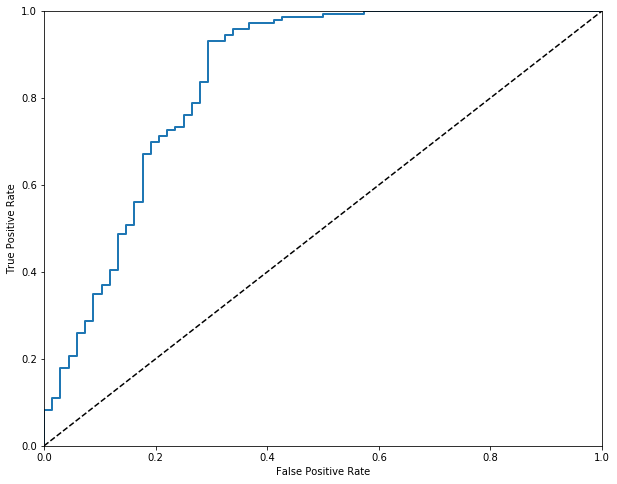

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

probs = log_reg.predict_proba(x)
fpr, tpr, thresholds = roc_curve(ynew, probs[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under ROC =", roc_auc)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [10]:
import statsmodels.api as sm

xnew = sm.add_constant(x)
log_reg = sm.Logit(ynew,xnew).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.365812
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             glass-type   No. Observations:                  214
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            9
Date:                Sun, 17 Mar 2019   Pseudo R-squ.:                  0.4149
Time:                        08:11:00   Log-Likelihood:                -78.284
converged:                       True   LL-Null:                       -133.79
                                        LLR p-value:                 9.183e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -346.8934    380.361     -0.912      0.362   -1092.388     398.601
RI           324.4934    225.

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e8)
logreg.fit(x, ynew)
y_pred = log_reg.predict(x)
accuracy = accuracy_score(ynew, y_pred)
print("Coefficients :", np.round(logreg.intercept_,4), np.round(logreg.coef_,4))
print("Accuracy =",accuracy)

ValueError: shapes (214,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

### Example of Softmax Regression Model

To illustrate the softmax regression, the same dataset as in the logistic regression is considered. But, we will consider the classification of 7 types of glasses.

In [12]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

glass = pd.read_csv("glass.data.csv", 
                    header=None,
                    names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"])
glass = glass.drop("Id", axis=1)
varlist = list(glass.columns)
y = glass.iloc[:,len(varlist)-1]
x = glass.iloc[:,:len(varlist)-1]

softmaxreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1e10)
soft_reg = softmaxreg.fit(x, y)
y_pred = soft_reg.predict(x)
accuracy = accuracy_score(y, y_pred)
print("Coefficients :", np.round(soft_reg.intercept_,4), np.round(soft_reg.coef_,4))
print("Accuracy =",accuracy)

Coefficients : [-0.0138  0.0249  0.0093  0.0101 -0.0253 -0.0051] [[-0.0153 -1.4516  2.8754 -2.1703  0.0873 -0.4716  0.9905 -0.6111 -0.1292]
 [ 0.0402 -0.5357  0.5447  0.67    0.0287  0.4808  0.5173 -0.0984  0.3842]
 [ 0.0125  0.2257  1.6607 -0.8521 -0.1648 -0.4391  0.6614 -0.3247  0.0055]
 [ 0.0119 -0.729  -1.3767  1.6224  0.1686  1.5347 -0.2316 -0.0651 -0.0274]
 [-0.0426  1.7977 -1.4447 -0.2969 -0.1871 -1.0046 -0.7316 -0.5028 -0.1338]
 [-0.0068  0.6929 -2.2594  1.027   0.0672 -0.1002 -1.206   1.6021 -0.0992]]
Accuracy = 0.654205607477
